In [13]:
# 加载数据
import torch
from joblib import dump, load
import torch.utils.data as Data
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
# 参数与配置
torch.manual_seed(100)  # 设置随机种子，以使实验结果具有可重复性
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载数据集
def dataloader(batch_size, workers=2):
    # 训练集
    train_set = load('../dataresult/train_set')
    train_label = load('../dataresult/train_label')
    # 测试集
    test_set = load('../dataresult/test_set')
    test_label = load('../dataresult/test_label')

    # 加载数据
    train_loader = Data.DataLoader(dataset=Data.TensorDataset(train_set, train_label),
                                   batch_size=batch_size, num_workers=workers, drop_last=True)
    test_loader = Data.DataLoader(dataset=Data.TensorDataset(test_set, test_label),
                                  batch_size=batch_size, num_workers=workers, drop_last=True)
    return train_loader, test_loader

batch_size = 16
# 加载数据
train_loader, test_loader = dataloader(batch_size)

print(len(train_loader))
print(len(test_loader))

16
9


In [14]:
# 定义 GRUModel 模型
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        """
        预测任务  params:
        input_dim        : 输入数据的维度
        hidden_layer_size: 隐层的数目和维度
        output_dim       : 输出维度
        """
        super().__init__()
        # GRU层数
        self.num_layers = len(hidden_layer_sizes)
        self.gru_layers = nn.ModuleList()  # 用于保存GRU层的列表

        # 定义第一层GRU 
        self.gru_layers.append(nn.GRU(input_dim, hidden_layer_sizes[0], batch_first=True))
        
        # 定义后续的GRU层
        for i in range(1, self.num_layers):
                self.gru_layers.append(nn.GRU(hidden_layer_sizes[i-1], hidden_layer_sizes[i], batch_first=True))
                
        # 定义线性层
        self.linear  = nn.Linear(hidden_layer_sizes[-1], output_dim)

       
    def forward(self, input_seq):  
        # 输入形状，适应网络输入[batch, seq_length, dim]
        # 使用 permute 方法进行维度变换， 实现了维度的变换，而不改变数据的顺序
        gru_out = input_seq
        for gru in self.gru_layers:
            gru_out, _= gru(gru_out)  ## 进行一次LSTM层的前向传播
        # print(gru_out.size())  # torch.Size([1, 1, 64])
        predict = self.linear(gru_out[:, -1, :]) # torch.Size([1, 64]  # 仅使用最后一个时间步的输出 
        return predict

In [15]:
# 定义模型参数
input_dim = 14   # 输入维度为14维数据
hidden_layer_sizes = [32, 64] # LSTM隐藏层
output_dim = 1 # 输出维度为 1

model = GRUModel(input_dim, hidden_layer_sizes, output_dim)  

# 定义损失函数和优化函数 
loss_function = nn.MSELoss()  # loss
learn_rate = 0.0003
optimizer = torch.optim.Adam(model.parameters(), learn_rate)  # 优化器

# 看下这个网络结构总共有多少个参数
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

  1344
  3072
    96
    96
  6144
 12288
   192
   192
    64
     1
______
 23489


In [16]:
print(model)

GRUModel(
  (gru_layers): ModuleList(
    (0): GRU(14, 32, batch_first=True)
    (1): GRU(32, 64, batch_first=True)
  )
  (linear): Linear(in_features=64, out_features=1, bias=True)
)


Epoch:  1 train_MSE-Loss: 0.77509645
Epoch:  2 train_MSE-Loss: 0.57609019
Epoch:  3 train_MSE-Loss: 0.40205063
Epoch:  4 train_MSE-Loss: 0.24828371
Epoch:  5 train_MSE-Loss: 0.15040889
Epoch:  6 train_MSE-Loss: 0.11655169
Epoch:  7 train_MSE-Loss: 0.10424325
Epoch:  8 train_MSE-Loss: 0.09435866
Epoch:  9 train_MSE-Loss: 0.08697874
Epoch: 10 train_MSE-Loss: 0.08039312
Epoch: 11 train_MSE-Loss: 0.07398574
Epoch: 12 train_MSE-Loss: 0.06784456
Epoch: 13 train_MSE-Loss: 0.06203750
Epoch: 14 train_MSE-Loss: 0.05656174
Epoch: 15 train_MSE-Loss: 0.05142070
Epoch: 16 train_MSE-Loss: 0.04664538
Epoch: 17 train_MSE-Loss: 0.04227454
Epoch: 18 train_MSE-Loss: 0.03833928
Epoch: 19 train_MSE-Loss: 0.03485687
Epoch: 20 train_MSE-Loss: 0.03182572
Epoch: 21 train_MSE-Loss: 0.02922141
Epoch: 22 train_MSE-Loss: 0.02699806
Epoch: 23 train_MSE-Loss: 0.02509515
Epoch: 24 train_MSE-Loss: 0.02344753
Epoch: 25 train_MSE-Loss: 0.02199492
Epoch: 26 train_MSE-Loss: 0.02068802
Epoch: 27 train_MSE-Loss: 0.01949037
E

findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsof

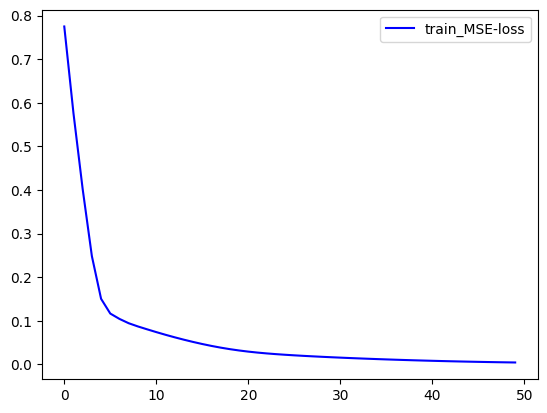

min_MSE: 0.004307193787099095


In [17]:
# 训练模型
import time
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font", family='Microsoft YaHei')

def model_train(epochs, model, optimizer, loss_function, train_loader, device):
    model = model.to(device)

    # 最低MSE  
    minimum_mse = 1000.
    # 最佳模型
    best_model = model

    train_mse = []     # 记录在训练集上每个epoch的 MSE 指标的变化情况   平均值
  
    # 计算模型运行时间
    start_time = time.time()
    for epoch in range(epochs):
         # 训练
        model.train()
        train_mse_loss = []    #保存当前epoch的MSE loss和
        for seq, labels in train_loader: 
            seq, labels = seq.to(device), labels.to(device)
            # 每次更新参数前都梯度归零和初始化
            optimizer.zero_grad()
            # 前向传播
            y_pred = model(seq)  #   torch.Size([16, 10])
            # 损失计算
            loss = loss_function(y_pred, labels)
            train_mse_loss.append(loss.item()) # 计算 MSE 损失
            # 反向传播和参数更新
            loss.backward()
            optimizer.step()
        #     break
        # break
        # 计算总损失
        train_av_mseloss = np.average(train_mse_loss) # 平均
        train_mse.append(train_av_mseloss)
        print(f'Epoch: {epoch+1:2} train_MSE-Loss: {train_av_mseloss:10.8f}')
       
        # 如果当前模型的 MSE 低于于之前的最佳准确率，则更新最佳模型
        #保存当前最优模型参数
        if train_av_mseloss < minimum_mse:
            minimum_mse = train_av_mseloss
            best_model = model# 更新最佳模型的参数
         
    # 保存最后的参数
    # torch.save(model, 'final_model_gru.pt')
    # 保存最好的参数
    torch.save(best_model, 'best_model_gru.pt')
    print(f'\nDuration: {time.time() - start_time:.0f} seconds')
    
    # 可视化
    plt.plot(range(epochs), train_mse, color = 'b',label = 'train_MSE-loss')
    plt.legend()
    plt.show()   #显示 lable 
    print(f'min_MSE: {minimum_mse}')

#  模型训练
epochs = 50
model_train(epochs, model, optimizer, loss_function, train_loader, device)

### 第一部分，训练集评估

In [21]:
# 模型预测
# 模型 测试集 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = torch.load('best_model_gru.pt')
model = torch.load('best_model_gru.pt', weights_only=False)
model = model.to(device)

# 预测数据
origin_data = []
pre_data = []
with torch.no_grad():
        for data, label in train_loader:
            # 原始标签
            origin_lable = label.tolist()
            origin_data += origin_lable
            model.eval()  # 将模型设置为评估模式
            
            # 预测
            data, label = data.to(device), label.to(device)
            train_pred = model(data)  # 对测试集进行预测
            train_pred = train_pred.tolist()
            pre_data += train_pred      

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 反归一化处理
# 使用相同的均值和标准差对预测结果进行反归一化处理
# 反标准化
scaler  = load('../dataresult/scaler')
origin_data = scaler.inverse_transform(origin_data)
pre_data = scaler.inverse_transform(pre_data)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 模型分数
score = r2_score(origin_data, pre_data)
print('训练集上 模型分数-R^2:',score)

print('*'*50)
# 训练集上的预测误差
train_mse = mean_squared_error(origin_data, pre_data)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(origin_data, pre_data)
print('训练数据集上的均方误差-MSE: ',train_mse)
print('训练数据集上的均方根误差-RMSE: ',train_rmse)
print('训练数据集上的平均绝对误差-MAE: ',train_mae)

训练集上 模型分数-R^2: 0.9955615132617291
**************************************************
训练数据集上的均方误差-MSE:  0.0003097215966528545
训练数据集上的均方根误差-RMSE:  0.017598908962002575
训练数据集上的平均绝对误差-MAE:  0.01394379941009976


# 测试集评估

In [24]:
# 模型 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = torch.load('best_model_gru.pt')
model = torch.load('best_model_gru.pt', weights_only=False)
model = model.to(device)

# 预测数据
test_origin_data = []
test__pre_data = []
with torch.no_grad():
        for data, label in test_loader:
            # 原始标签
            origin_lable = label.tolist()
            test_origin_data += origin_lable
            model.eval()  # 将模型设置为评估模式
            
            # 预测
            data, label = data.to(device), label.to(device)
            pred = model(data)  # 对测试集进行预测
            pred = pred.tolist()
            test__pre_data += pred        

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 反归一化处理
# 使用相同的均值和标准差对预测结果进行反归一化处理
# 反标准化
scaler  = load('../dataresult/scaler')
test_origin_data = scaler.inverse_transform(test_origin_data)
test__pre_data = scaler.inverse_transform(test__pre_data)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 模型分数
score = r2_score(test_origin_data, test__pre_data)
print('测试集上 模型分数-R^2:',score)

print('*'*50)
# 训练集上的预测误差
test_mse = mean_squared_error(test_origin_data, test__pre_data)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(test_origin_data, test__pre_data)
print('测试数据集上的均方误差-MSE: ',test_mse)
print('测试数据集上的均方根误差-RMSE: ',test_rmse)
print('测试数据集上的平均绝对误差-MAE: ',test_mae)

测试集上 模型分数-R^2: 0.9969996533943785
**************************************************
测试数据集上的均方误差-MSE:  0.00020767300427888819
测试数据集上的均方根误差-RMSE:  0.01441086410590594
测试数据集上的平均绝对误差-MAE:  0.012000809300758133


/opt/conda/envs/py39/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23551 (\N{CJK UNIFIED IDEOGRAPH-5BFF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21629 (\N{CJK UNIFIED IDEOGRAPH-547D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) De

/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei' not found.
findfont: Font family 'Microsoft YaHei

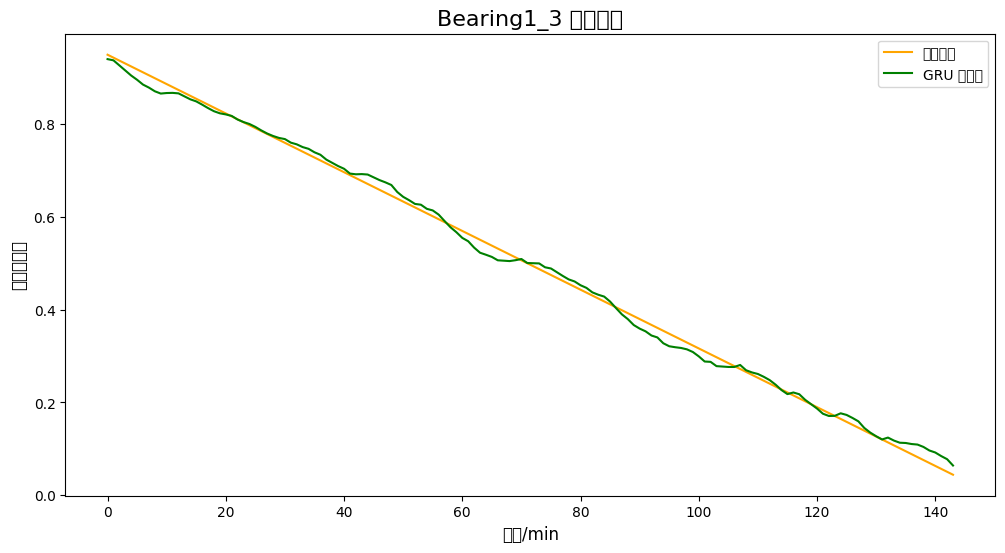

['../画图对比/gru_pre']

In [26]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font", family='Microsoft YaHei')

# 可视化结果
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_origin_data, label='真实寿命',color='orange')  # 真实值
plt.plot(test__pre_data, label='GRU 预测值',color='green')  # 预测值

# plt.plot([-1,170],[2.0*0.7,2.0*0.7],c='black',lw=1,ls='--')  # 临界点直线  可自己调整位置

plt.xlabel('时间/min', fontsize=12)
plt.ylabel('寿命百分比', fontsize=12)
plt.title('Bearing1_3 预测结果', fontsize=16)
plt.legend()
plt.show()

# 保存数据
# 保存数据
dump(test_origin_data, '../画图对比/gru_origin') 
dump(test__pre_data, '../画图对比/gru_pre') 